In [1]:
import numpy as np
import pandas as pd
import re
import glob
from   os import path
import matplotlib.pyplot as plt
import seaborn as sns
from   IPython.core.display import HTML


HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

sns.set_theme()
sns.set_context("paper")

## SA Analysis

In [33]:
dfScrapedReuters = pd.read_csv('Merged Scraped Reuters.csv')
dfScrapedMW = pd.read_csv('Merged Scraped MW.csv')
dfScrapedTMF = pd.read_csv('Merged Scraped TMF.csv')
# dfScrapedFrames = [dfScrapedReuters, dfScrapedTMF]
# dfScraped = pd.concat(dfScrapedFrames)

In [31]:
dfScrapedReuters = dfScrapedReuters.sort_values(by = ['Date'], ascending = True)
mask = (dfScrapedReuters['Date'] > '2015-02-03') & (dfScrapedReuters['Date'] <= '2021-06-16')
dfScrapedReuters.loc[mask]

,index,Date,Headline,Text
0,0,2016-01-28,US STOCKS SNAPSHOT-Wall St ends up sharply on ...,"NEW YORK, Aug 16 (Reuters) - U.S. stocks rebou..."
1,1,2016-03-02,US STOCKS SNAPSHOT-Wall Street ends mixed as M...,Sept 19 (Reuters) - Wall Street ended mixed on...
2,2,2016-03-31,"US STOCKS SNAPSHOT-Boeing, J&J pull down Wall ...","NEW YORK, Oct 18 (Reuters) - Wall Street fell ..."
3,3,2016-05-17,BRIEF-Novartis Announces EU Approval Of MS Dru...,Jan 20 (Reuters) - Novartis AG:* NOVARTIS ANNO...
4,4,2016-10-25,BRIEF-Sanofi To Create New Industry Leading Eu...,Feb 24 (Reuters) - Sanofi SA:* SANOFI TO CREAT...
...,...,...,...,...
28993,28993,2021-06-16,Google must face shareholder lawsuit claiming ...,June 16 (Reuters) - A U.S. appeals court on We...
28994,28994,2021-06-16,Regeneron antibodies help asymptomatic and hos...,June 16 (Reuters) - The following is a roundup...
28995,28995,2021-06-16,McDonald's expands loyalty program to some New...,"NEW YORK, June 16 (Reuters) - McDonald's Corp ..."
28988,28988,2021-06-16,GM escalates the electric vehicle arms race,"DETROIT, June 16 (Reuters) - General Motors Co..."


In [34]:
dfScrapedMW = dfScrapedMW.sort_values(by = ['Date'], ascending = True)
mask = (dfScrapedMW['Date'] > '2015-02-03') & (dfScrapedMW['Date'] <= '2021-06-16')
dfScrapedMW.loc[mask]

,index,Date,Headline,Text
55026,55026,2015-02-04,"Keurig Green Mountain burned by weak outlook, ...",SAN FRANCISCO (MarketWatch) — Keurig Green Mou...
55027,55027,2015-02-04,4 stocks that may surprise you post earnings,NEW YORK (MarketWatch)—A few companies in the ...
55028,55028,2015-02-04,7 ways Chipotle stock can spice up your portfolio,Chipotle Mexican Grill Inc. is having a rough ...
55029,55029,2015-02-04,Clorox shares rise 5.8% after company reports ...,NEW YORK (MarketWatch) -- Clorox Co. shares CL...
55030,55030,2015-02-04,Whirlpool sales rise 18% on acquisitions,Whirlpool Corp. said Wednesday that recent acq...
...,...,...,...,...
163224,163224,2021-06-16,Why HP CEO sees a continued boom for laptops,The head of HP Inc. says the pandemic has fund...
163223,163223,2021-06-16,HP Inc. stock underperforms Wednesday when com...,"Shares of HP Inc. HPQ, +0.93% shed 1.89% to $2..."
163221,163221,2021-06-16,"Cummins Inc. stock falls Wednesday, underperfo...","Shares of Cummins Inc. CMI, +1.79% shed 1.64% ..."
163229,163229,2021-06-16,Essex Property Trust Inc. stock falls Wednesda...,"Shares of Essex Property Trust Inc. ESS, +0.31..."


In [36]:
dfScrapedMW

,index,Date,Headline,Text
0,0,2000-03-01,Waiting on Friday's jobs data,Today's edition was held up by technical probl...
1,1,2003-07-15,S&P 500 testing upper end of range,CHICAGO (CBS.MW) - This piece highlights level...
2,2,2003-08-04,Testing important near-term support,CHICAGO (CBS.MW) -- When we reviewed the Nasda...
3,3,2003-08-18,Dow targets new 52-week high,CHICAGO (CBS.MW) - So the primary observation ...
4,4,2003-08-19,Indexes still positioned for additional upside,CHICAGO (CBS.MW) -- When we reviewed the Nasda...
...,...,...,...,...
221122,221122,2022-01-07,D.R. Horton stock sinks to lead the S&P 500's ...,"Shares of D.R. Horton Inc. DHI, -6.17% sank 5...."
221121,221121,2022-01-07,Raytheon Technologies Corp. stock rises Friday...,"Shares of Raytheon Technologies Corp. RTX, +0...."
221133,221133,2022-01-07,Celanese Corp. stock underperforms Friday when...,"Shares of Celanese Corp. CE, +0.21% inched 0.2..."
221207,221207,2022-01-08,5 Companies That Began 2022 With Upbeat News o...,"Royalty Pharma, Life Storage, and Viatris, amo..."


In [35]:
dfScrapedTMF = dfScrapedTMF.sort_values(by = ['Date'], ascending = True)
mask = (dfScrapedTMF['Date'] > '2015-02-03') & (dfScrapedTMF['Date'] <= '2021-06-16')
dfScrapedTMF.loc[mask]

,index,Date,Headline,Text
76790,76790,2015-02-04,Activision Blizzard Earnings Preview: The Big ...,Activision Blizzard Earnings Preview: The Big ...
76791,76791,2015-02-04,"OK, I Admit It: Gilead Sciences' Dividend Payo...","OK, I Admit It: Gilead Sciences' Dividend Payo..."
76792,76792,2015-02-04,5 Things AbbVie Inc.'s Management Wants You to...,5 Things AbbVie Inc.'s Management Wants You to...
76793,76793,2015-02-04,"AbbVie Inc. Earnings: After a Strong Year, Eye...","AbbVie Inc. Earnings: After a Strong Year, Eye..."
76794,76794,2015-02-04,Why You Should Buy McDonald's and Sell Shake S...,Why You Should Buy McDonald's and Sell Shake S...
...,...,...,...,...
143289,143289,2021-06-16,The Sky's the Limit at Disney World and Disney...,The Sky's the Limit at Disney World and Disney...
143286,143286,2021-06-16,3 Reasons Tesla Stock Could Still Crush the Ma...,3 Reasons Tesla Stock Could Still Crush the Ma...
143287,143287,2021-06-16,Is PayPal a No-Brainer Fintech Investment?,Is PayPal a No-Brainer Fintech Investment?. Pa...
143288,143288,2021-06-16,Qualcomm's Interest in Arm Reveals Its Greates...,Qualcomm's Interest in Arm Reveals Its Greates...


## NER Analysis

In [6]:
dfReuters = pd.read_csv('Reuters Article Count.csv')
dfMW = pd.read_csv('MW Article Count.csv')
dfTMF = pd.read_csv('TMF Article Count.csv')
dfReutersNER = pd.read_csv('Reuters Post NER.csv')
dfMWNER = pd.read_csv('MW Post NER.csv')
dfTMFNER = pd.read_csv('TMF Post NER.csv')

dfReuters = dfReuters.drop(['Unnamed: 0'], axis = 1)
dfMW = dfMW.drop(['Unnamed: 0'], axis = 1)
dfTMF = dfTMF.drop(['Unnamed: 0'], axis = 1)
dfReutersNER = dfReutersNER.drop(['Unnamed: 0'], axis = 1)
dfMWNER = dfMWNER.drop(['Unnamed: 0'], axis = 1)
dfTMFNER = dfTMFNER.drop(['Unnamed: 0'], axis = 1)

dfTMF = dfTMF.rename(columns={'Pre-NER': 'TMF'})

In [15]:
print("Reuters Scrapping Sum: ", dfReuters['Reuters'].sum())
print("MW Scrapping Sum: ", dfMW['MW'].sum())
print("TMF Scrapping Sum: ", dfTMF['TMF'].sum())

print("Reuters NER Sum: ", dfReutersNER['Reuters'].sum())
print("MW NER Sum: ", dfMWNER['MW'].sum())
print("TMF NER Sum: ", dfTMFNER['TMF'].sum())

Reuters Scrapping Sum:  38141
MW Scrapping Sum:  309187
TMF Scrapping Sum:  205270
Reuters NER Sum:  35741
MW NER Sum:  236214
TMF NER Sum:  147413


In [10]:
dfresult = dfReuters.merge(dfTMF, how='left').merge(dfMW, how='left')
dfresult = dfresult.fillna(0)
dfresult['Pre-NER'] = dfresult['Reuters']+dfresult['TMF']+dfresult['MW']
dfresult=dfresult[['Company', 'Pre-NER']]

In [30]:
dfner = dfReutersNER.merge(dfMWNER, how='left').merge(dfTMFNER, how='left')
dfner = dfner.fillna(0)
dfner['Post-NER'] = dfner['Reuters']+dfner['TMF']+dfner['MW']
dfner=dfner[['Company', 'Post-NER']]
# dfner = dfresult.sort_values(by = ['Count'], ascending = False).head(20)
dfCompare = dfresult.merge(dfner, how='left')
# dfCompare['%Diff'] = (dfCompare['Pre-NER']-dfCompare['Post-NER'])/dfCompare['Pre-NER']*100
dfCompare['AbsDiff'] = dfCompare['Pre-NER'] - dfCompare['Post-NER']
dfCompare[['Pre-NER', 'Post-NER', 'AbsDiff']] = dfCompare[['Pre-NER', 'Post-NER', 'AbsDiff']].astype(int)
print("Total Articles Scraped:   ", dfCompare['Pre-NER'].sum())
print("Total Articles after NER: ", dfCompare['Post-NER'].sum())
print("Percentage of Articles Reminaing: ", int(dfCompare['Post-NER'].sum()/dfCompare['Pre-NER'].sum()*100), "%")
dfCompare

Total Articles Scraped:    546920
Total Articles after NER:  415142
Percentage of Articles Reminaing:  75 %


,Company,Pre-NER,Post-NER,AbsDiff
0,3M Company,2399,1141,1258
1,ABB,303,257,46
2,AT&T Inc,4142,3262,880
3,AbbVie,2417,1712,705
4,Abbott Laboratories,2385,1775,610
...,...,...,...,...
490,Yum! Brands,1792,923,869
491,Zimmer Biomet Holdings Inc,400,370,30
492,Zoetis Inc.,234,159,75
493,eBay,3327,1853,1474


In [31]:
dfCompare = dfCompare.sort_values(by=['AbsDiff'], ascending=False)
dfCompare = dfCompare.set_index('AbsDiff')
dfCompare = dfCompare.dropna()

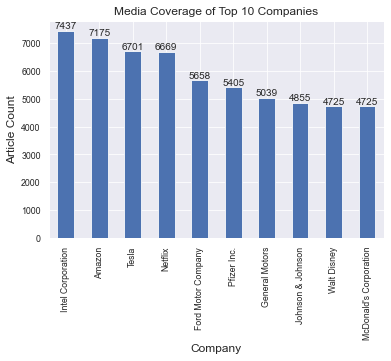

In [38]:
dfMostArticles = dfCompare.sort_values(by=['Pre-NER'], ascending=False).head(10)
dfMostArticles = dfMostArticles.set_index('Company')
ax = dfMostArticles.plot(y='Pre-NER', kind="bar")
ax.get_legend().remove()
plt.title("Media Coverage of Top 10 Companies", fontsize=12)
plt.xlabel("Company", fontsize=12)
plt.ylabel("Article Count", fontsize=12)

fig = plt.gcf()
# fig.set_size_inches(14, 6)

for bar in ax.patches:
    ax.annotate(bar.get_height(),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')

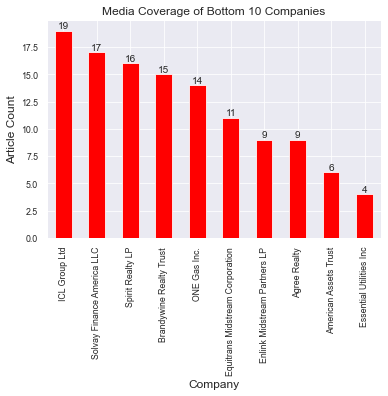

In [42]:
dfMostArticles = dfCompare.sort_values(by=['Pre-NER'], ascending=False).tail(10)
dfMostArticles = dfMostArticles.set_index('Company')
ax = dfMostArticles.plot(y='Pre-NER', kind="bar", color='Red')
ax.get_legend().remove()
plt.title("Media Coverage of Bottom 10 Companies", fontsize=12)
plt.xlabel("Company", fontsize=12)
plt.ylabel("Article Count", fontsize=12)

fig = plt.gcf()
# fig.set_size_inches(14, 6)

for bar in ax.patches:
    ax.annotate(bar.get_height(),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')

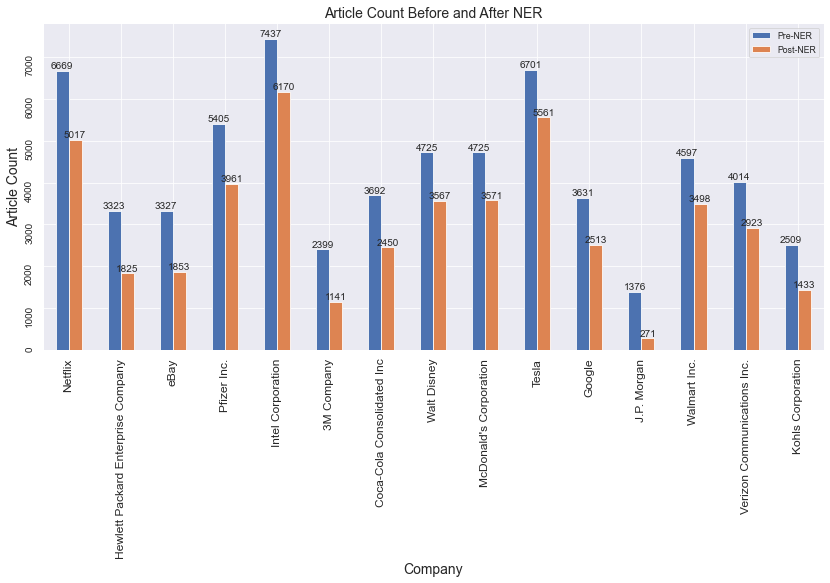

In [48]:
dfBiggest = dfCompare.head(15)
dfBiggest = dfBiggest.set_index('Company')
ax = dfBiggest.plot(kind="bar")
plt.title("Article Count Before and After NER", fontsize=14)
plt.xlabel("Company", fontsize=14)
plt.ylabel("Article Count", fontsize=14)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=10, rotation=90)

fig = plt.gcf()
fig.set_size_inches(14, 6)

for bar in ax.patches:
    ax.annotate(bar.get_height(),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')

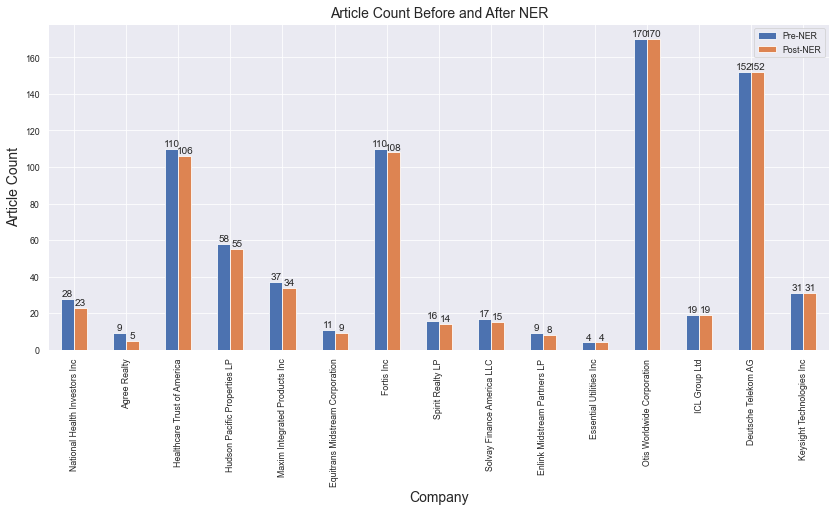

In [36]:
dfBiggest = dfCompare.tail(15)
dfBiggest = dfBiggest.set_index('Company')
ax = dfBiggest.plot(kind="bar")
plt.title("Article Count Before and After NER", fontsize=14)
plt.xlabel("Company", fontsize=14)
plt.ylabel("Article Count", fontsize=14)

fig = plt.gcf()
fig.set_size_inches(14, 6)

for bar in ax.patches:
    ax.annotate(bar.get_height(),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')